In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


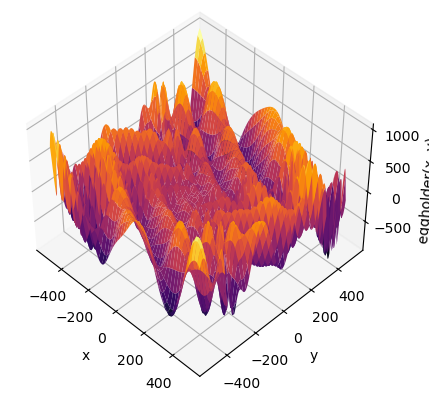

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def eggholder(x):
  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
  -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

x = np.arange(-512, 512)
y = np.arange(-512, 512)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

global=> -718.16746
x1=> 283.07591 x2=> -487.12566
Generacion: 1 - - - Gbest: [-396.16589016 -415.71018553]


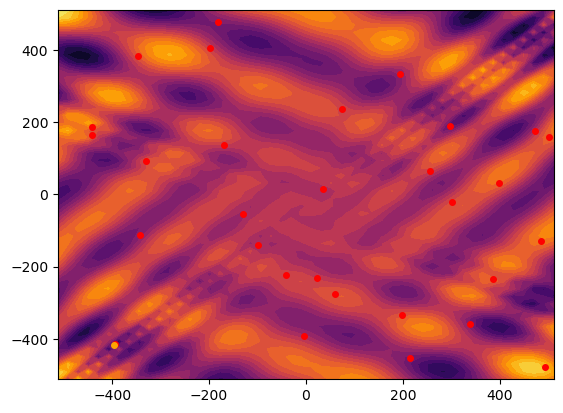

Generacion: 2 - - - Gbest: [-393.46589016 -413.01018553]
Generacion: 3 - - - Gbest: [-393.46589016 -413.01018553]
Generacion: 4 - - - Gbest: [-392.10551235 -411.85613794]
Generacion: 5 - - - Gbest: [-392.92356254 -412.84337892]
Generacion: 6 - - - Gbest: [-393.57254903 -413.6265901 ]
Generacion: 7 - - - Gbest: [-394.07010534 -414.227052  ]
Generacion: 8 - - - Gbest: [-394.43829701 -414.67139381]
Generacion: 9 - - - Gbest: [-394.7009404  -414.98835763]
Generacion: 10 - - - Gbest: [-394.88128886 -415.20600613]
Generacion: 11 - - - Gbest: [-395.00031884 -415.34965413]
Generacion: 12 - - - Gbest: [-395.0757045 -415.4406312]
Generacion: 13 - - - Gbest: [-395.12143846 -415.49582396]
Generacion: 14 - - - Gbest: [-395.14796416 -415.52783575]
Generacion: 15 - - - Gbest: [-395.16264172 -415.54554895]
Generacion: 16 - - - Gbest: [-395.17037189 -415.5548779 ]
Generacion: 17 - - - Gbest: [-395.17423698 -415.55954237]
Generacion: 18 - - - Gbest: [-395.17606646 -415.56175022]
Generacion: 19 - - - Gbe

In [3]:
import numpy as np
from random import random,seed
import math
import random as rand
import matplotlib.pyplot as plt

seed(1)

def eggholder(x):
  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
  -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

x_max=512
x_min=-512

c1=2.05
c2=2.05
max_v = 5
ini_v=0.5

maxiter = 1000
w0 = 0.9
wf = 0.1
slope = (wf-w0)/maxiter
w= w0
max_v = 5

S=10
x=np.zeros((S,2))
v=np.zeros((S,2))
y=np.zeros((S,2))

part,dim=x.shape

f_ind=1e10*np.ones([part,1])
fx=np.zeros((part,1))

for i in range(part):
  for j in range(dim):
    x[i,j]=x_min + (x_max-x_min) * random()
    v[i,j]=ini_v
    y[i,j]=1e10

t=0

while t<maxiter:

  for i in range(part):
    fx[i,0]=eggholder(x[i,:])
    if fx[i,0]<f_ind[i,0]:
      y[i,:]=x[i,:]
      f_ind[i,0]=fx[i,0]

  bestfitness=np.amin(f_ind)
  result = np.where(f_ind == np.amin(f_ind))
  p=result[0]

  ys=y[p,:]

  for j in range(dim):
    for i in range(part):
      r1=random()
      r2=random()
      v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

      if math.fabs(v[i,j])>max_v:
        if v[i,j]>0:
          v[i,j] = max_v
        else:
          v[i,j] = -max_v

      x[i,j]=x[i,j] + v[i,j]

  w=w+slope
  t=t+1

print("global=> {:.5f}".format(eggholder(ys[0,:])))
print("x1=> {:.5f} x2=> {:.5f}".format(ys[0,0],ys[0,1]))

num_variables=2
generation=0
x_max=512
x_min=-512


plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.grid(True)

# create data points
xx = np.linspace(-512, 512)
yy = np.linspace(-512, 512)
# create grid
x1, x2 = np.meshgrid(xx, yy)

l=[x1,x2]
arr = np.array(l)

z = eggholder(arr)

#fig, ax = plt.subplots()
# set labels

c1=2.05
c2=2.05
ini_v=3

maxiter = 30
w0 = 0.9
wf=0.1
slope = (wf-w0)/maxiter
w= w0
#max_v = ini_v/3
max_v = 5

S=30 #número de partículas

d=2

x=np.zeros((S,d))
v=np.zeros((S,d))
y=np.zeros((S,d))

part,dim=x.shape

f_ind=1e10*np.ones([part,1])
fx=np.zeros((part,1))

for i in range(part):
  for j in range(dim):
    x[i,j]=x_min+ (x_max-x_min) * random()
    v[i,j]=ini_v
    y[i,j]=1e10

t=0

while (generation < 32):
    cp=ax.contourf(x1, x2, z, 20, cmap='inferno')
    for i in range(part):
        fx[i,0]=eggholder(x[i,:])

        if fx[i,0]<f_ind[i,0]:
            y[i,:]=x[i,:]
            f_ind[i,0]=fx[i,0]

    bestfitness=np.amin(f_ind)
    result = np.where(f_ind == np.amin(f_ind))
    p=result[0]

    ys=y[p,:]#posição da melhor partícula

    for j in range(dim):
        for i in range(part):
            r1=random()
            r2=random()

            v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

            if math.fabs(v[i,j])>max_v:
                if v[i,j]>0:
                    v[i,j] = max_v
                else:
                    v[i,j] = -max_v

            x[i,j]=x[i,j] + v[i,j]

    w=w+slope

    generation=generation+1

    print('Generacion: ' + str(generation) + ' - - - Gbest: ' +str(ys[0,:]))

    line1 = ax.plot(x[:,0], x[:,1], 'ro', linewidth=2, markersize=4)
    line2 = ax.plot(ys[0,0],ys[0,1], 'o',color='orange', linewidth=2, markersize=4)


    ax.set_xlim(x_min, x_max)
    ax.set_ylim(x_min, x_max)

    #fig.canvas.draw()
    plt.pause(0.1)
    ax.clear()
    ax.grid(True)

In [1]:
import numpy as np
from random import random,seed
import math
import random as rand
import matplotlib.pyplot as plt
import statistics

seed(1)

def eggholder(x):
  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
  -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

x_max=512
x_min=-512

c1=2.05
c2=2.05
ini_v=1

maxiter = 1000
w0 = 0.9
wf = 0.1
slope = (wf-w0)/maxiter
w= w0
max_v = ini_v/3
S=20

num_acertos=0
f_exp=np.zeros([32,1])

for exp in range(0,32):
  x=np.zeros((S,2))
  v=np.zeros((S,2))
  y=np.zeros((S,2))

  part,dim=x.shape

  f_ind=1e10*np.ones([part,1])
  fx=np.zeros((part,1))

  for i in range(part):
    for j in range(dim):
      x[i,j]=x_min + (x_max-x_min) * random()
      v[i,j]=ini_v
      y[i,j]=1e10

  t=0

  while t<maxiter:

    for i in range(part):
      fx[i,0]=eggholder(x[i,:])
      if fx[i,0]<f_ind[i,0]:
        y[i,:]=x[i,:]
        f_ind[i,0]=fx[i,0]

    bestfitness=np.amin(f_ind)
    result = np.where(f_ind == np.amin(f_ind))
    p=result[0]

    ys=y[p,:]

    for j in range(dim):
      for i in range(part):
        r1=random()
        r2=random()
        v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

        if math.fabs(v[i,j])>max_v:
          if v[i,j]>0:
            v[i,j] = max_v
          else:
            v[i,j] = -max_v

        x[i,j]=x[i,j] + v[i,j]

    w=w+slope
    t=t+1

  error=np.abs(eggholder(ys[0,:])-0)
  if error<=0.01:
    num_acertos=num_acertos+1

  f_exp[exp,0]=eggholder(ys[0,:])

  print("global=> {:.5f}".format(eggholder(ys[0,:])))
  print("x1=> {:.5f} x2=> {:.5f}".format(ys[0,0],ys[0,1]))

minimo=np.amin(f_exp)

media=statistics.mean(f_exp[:,0])
mediana=statistics.median(f_exp[:,0])
desvio=statistics.stdev(f_exp[:,0])

print(media)
print(mediana)
print(minimo)
print(desvio)
print(error)

global=> -682.47640
x1=> 288.86948 x2=> -500.12010
global=> -713.75309
x1=> 401.38652 x2=> -370.62428
global=> -746.88633
x1=> -395.43986 x2=> -419.03005
global=> -485.02959
x1=> 141.22865 x2=> 300.52533
global=> -850.46417
x1=> 418.49087 x2=> 432.96088
global=> -596.27617
x1=> 407.34990 x2=> 155.46432
global=> -773.86969
x1=> -450.42804 x2=> -374.00550
global=> -543.86333
x1=> -326.75917 x2=> 183.49426
global=> -507.20513
x1=> -432.36746 x2=> 97.99946
global=> -629.30209
x1=> 418.08982 x2=> 171.67946
global=> -552.59679
x1=> 324.38794 x2=> 208.99417
global=> -557.53237
x1=> 319.67399 x2=> 206.20674
global=> -554.42230
x1=> -335.52651 x2=> -400.19484
global=> -698.06985
x1=> -301.13340 x2=> -466.57645
global=> -756.67296
x1=> -486.66332 x2=> 373.83524
global=> -443.33688
x1=> -288.91619 x2=> -212.07673
global=> -693.40720
x1=> 461.32299 x2=> -304.03885
global=> -521.27391
x1=> 491.39552 x2=> -281.60529
global=> -462.66378
x1=> 154.62790 x2=> 314.43043
global=> -740.55481
x1=> -396.3038

In [2]:
import numpy as np
from math import radians, acos, degrees, cos, sin

# Definindo a matriz de rotação AB'
angle_degrees = 40
angle_radians = radians(angle_degrees)
AB = np.array([[cos(angle_radians), -sin(angle_radians), 0],
              [sin(angle_radians),  cos(angle_radians), 0],
              [0,                   0,                  1]])

# Definindo as coordenadas do ponto BP no quadro {B}
BP = np.array([0, 2, 0])

# Encontrando as coordenadas do ponto BP' no quadro {A}
BP_prime = np.dot(AB, BP)

# Calculando a orientação em graus
orientation = degrees(acos(-BP_prime[0] / np.linalg.norm(BP_prime)))

# Exibindo as coordenadas de BP' e a orientação
print(f'Coordenadas de BP\' no quadro {{A}}: {BP_prime}')
print(f'Orientação de {{B}} em relação a {{A}}: {orientation:.1f}°')

Coordenadas de BP' no quadro {A}: [-1.28557522  1.53208889  0.        ]
Orientação de {B} em relação a {A}: 50.0°


Generacion: 1 - - - Gbest: [94.13577942 41.29958522]


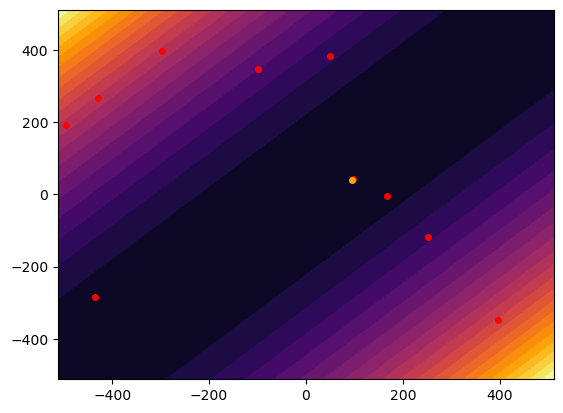

Generacion: 2 - - - Gbest: [94.13577942 41.29958522]
Generacion: 3 - - - Gbest: [91.83577942 44.78840007]
Generacion: 4 - - - Gbest: [87.60244608 45.4562633 ]
Generacion: 5 - - - Gbest: [84.13111275 46.00391115]
Generacion: 6 - - - Gbest: [81.37718831 46.43837845]
Generacion: 7 - - - Gbest: [79.26584623 46.77147004]
Generacion: 8 - - - Gbest: [77.7034531  47.01795782]
Generacion: 9 - - - Gbest: [76.58894599 47.19378577]
Generacion: 10 - - - Gbest: [75.82365112 47.31452097]
Generacion: 11 - - - Gbest: [75.3185565  47.39420619]
Generacion: 12 - - - Gbest: [74.99866324 47.4446735 ]
Generacion: 13 - - - Gbest: [74.80459466 47.47529034]
Generacion: 14 - - - Gbest: [74.69203489 47.4930481 ]
Generacion: 15 - - - Gbest: [74.62975181 47.50287406]
Generacion: 16 - - - Gbest: [74.59694939 47.50804907]
Generacion: 17 - - - Gbest: [74.58054818 47.51063658]
Generacion: 18 - - - Gbest: [74.57278494 47.51186133]
Generacion: 19 - - - Gbest: [74.56931736 47.51240838]
Generacion: 20 - - - Gbest: [74.5678

In [3]:
import numpy as np
from random import random,seed
import math
import random as rand
import matplotlib.pyplot as plt
import statistics

seed(1)

#def eggholder(x):
#  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
#  -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

def corno(x):
  return (np.sin(x[0]) * np.exp((1-np.cos(x[1]))**2)
  +np.cos(x[1]) * np.exp((1-np.sin(x[0]))**2)+(x[0]-x[1])**2)

x_max=512
x_min=-512

c1=2.05
c2=2.05
ini_v=1

maxiter = 1000
w0 = 0.9
wf = 0.1
slope = (wf-w0)/maxiter
w= w0
max_v = ini_v/3
S=20

num_acertos=0
f_exp=np.zeros([32,1])

for exp in range(0,32):
  x=np.zeros((S,2))
  v=np.zeros((S,2))
  y=np.zeros((S,2))

  part,dim=x.shape

  f_ind=1e10*np.ones([part,1])
  fx=np.zeros((part,1))

  for i in range(part):
    for j in range(dim):
      x[i,j]=x_min + (x_max-x_min) * random()
      v[i,j]=ini_v
      y[i,j]=1e10

  t=0

  while t<maxiter:

    for i in range(part):
      fx[i,0]=corno(x[i,:])
      if fx[i,0]<f_ind[i,0]:
        y[i,:]=x[i,:]
        f_ind[i,0]=fx[i,0]

    bestfitness=np.amin(f_ind)
    result = np.where(f_ind == np.amin(f_ind))
    p=result[0]

    ys=y[p,:]

    for j in range(dim):
      for i in range(part):
        r1=random()
        r2=random()
        v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

        if math.fabs(v[i,j])>max_v:
          if v[i,j]>0:
            v[i,j] = max_v
          else:
            v[i,j] = -max_v

        x[i,j]=x[i,j] + v[i,j]

    w=w+slope
    t=t+1

  error=np.abs(corno(ys[0,:])-0)
  if error<=0.01:
    num_acertos=num_acertos+1

  f_exp[exp,0]=corno(ys[0,:])

#  print("global=> {:.5f}".format(eggholder(ys[0,:])))
#  print("x1=> {:.5f} x2=> {:.5f}".format(ys[0,0],ys[0,1]))

num_variables=2
generation=0
x_max=512
x_min=-512

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)

xx = np.linspace(-512, 512)
yy = np.linspace(-512, 512)
x1, x2 = np.meshgrid(xx, yy)

l=[x1,x2]
arr = np.array(l)

z = corno(arr)

c1=2.05
c2=2.05
ini_v=3

maxiter = 30
w0 = 0.9
wf=0.1
slope = (wf-w0)/maxiter
w= w0
#max_v = ini_v/3
max_v = 5

S=10

d=2

x=np.zeros((S,d))
v=np.zeros((S,d))
y=np.zeros((S,d))

part,dim=x.shape

f_ind=1e10*np.ones([part,1])
fx=np.zeros((part,1))

for i in range(part):
  for j in range(dim):
    x[i,j]=x_min+ (x_max-x_min) * random()
    v[i,j]=ini_v
    y[i,j]=1e10

t=0

while (generation < 32):
    cp=ax.contourf(x1, x2, z, 20, cmap='inferno')
    for i in range(part):
        fx[i,0]=corno(x[i,:])

        if fx[i,0]<f_ind[i,0]:
            y[i,:]=x[i,:]
            f_ind[i,0]=fx[i,0]

    bestfitness=np.amin(f_ind)
    result = np.where(f_ind == np.amin(f_ind))
    p=result[0]

    ys=y[p,:]

    for j in range(dim):
        for i in range(part):
            r1=random()
            r2=random()

            v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

            if math.fabs(v[i,j])>max_v:
                if v[i,j]>0:
                    v[i,j] = max_v
                else:
                    v[i,j] = -max_v

            x[i,j]=x[i,j] + v[i,j]

    w=w+slope

    generation=generation+1

    print('Generacion: ' + str(generation) + ' - - - Gbest: ' +str(ys[0,:]))

    line1 = ax.plot(x[:,0], x[:,1], 'ro', linewidth=2, markersize=4)
    line2 = ax.plot(ys[0,0],ys[0,1], 'o',color='orange', linewidth=2, markersize=4)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(x_min, x_max)

    plt.pause(0.1)
    ax.clear()
    ax.grid(True)

    minimo=np.amin(f_exp)

media=statistics.mean(f_exp[:,0])
mediana=statistics.median(f_exp[:,0])
desvio=statistics.stdev(f_exp[:,0])

print(media, mediana, desvio, minimo)

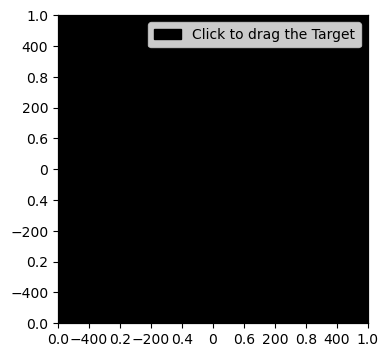

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(4,4))
plt.xlim([-500, 500])
plt.ylim([-500, 500])
ax = fig.add_subplot(111)

class Draggable_Target:
	lock = None
	def __init__(self, point):
		self.point = point
		self.press = None
		self.background = None
		self.ID = None

	def setID(self,ID):
		self.ID = ID
	def getID(self):
		return self.ID

	def connect(self):
		#'connect to all the events we need'
		self.cidpress = self.point.figure.canvas.mpl_connect('button_press_event', self.on_press)
		self.cidrelease = self.point.figure.canvas.mpl_connect('button_release_event', self.on_release)
		self.cidmotion = self.point.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

	def on_press(self, event):
		if event.inaxes != self.point.axes: return
		if Draggable_Target.lock is not None: return
		contains, attrd = self.point.contains(event)
		if not contains: return
		self.press = (self.point.center), event.xdata, event.ydata
		Draggable_Target.lock = self
		canvas = self.point.figure.canvas
		axes = self.point.axes
		self.point.set_animated(True)
		canvas.draw()
		self.background = canvas.copy_from_bbox(self.point.axes.bbox)
		axes.draw_artist(self.point)
		canvas.blit(axes.bbox)

	def on_motion(self, event):
		if Draggable_Target.lock is not self:
			return
		if event.inaxes != self.point.axes: return
		self.point.center, xpress, ypress = self.press
		dx = event.xdata - xpress
		dy = event.ydata - ypress
		self.point.center = (self.point.center[0]+dx, self.point.center[1]+dy)
		print(str(self.point.center[0])+','+str( self.point.center[1]),file = open('target.csv','w'))
		canvas = self.point.figure.canvas
		axes = self.point.axes
		canvas.restore_region(self.background)
		axes.draw_artist(self.point)
		canvas.blit(axes.bbox)

	def on_release(self, event):
		#'on release we reset the press data'
		if Draggable_Target.lock is not self:
			return

		self.press = None
		Draggable_Target.lock = None
		self.point.set_animated(False)
		self.background = None
		self.point.figure.canvas.draw()

	def disconnect(self):
		#'disconnect all the stored connection ids'
		self.point.figure.canvas.mpl_disconnect(self.cidpress)
		self.point.figure.canvas.mpl_disconnect(self.cidrelease)
		self.point.figure.canvas.mpl_disconnect(self.cidmotion)

drs = []
circles =     [patches.Circle( (10, -10),    20,  label='Click to drag the Target', fc = 'k',color = 'k', alpha=1)]
cnt = 0
for circ in circles:
	ax.add_patch(circ)
	dr = Draggable_Target(circ)
	dr.setID(cnt)
	dr.connect()
	drs.append(dr)
	cnt+=1
plt.legend()
plt.show()

Differential Evolution - Eggholder Function


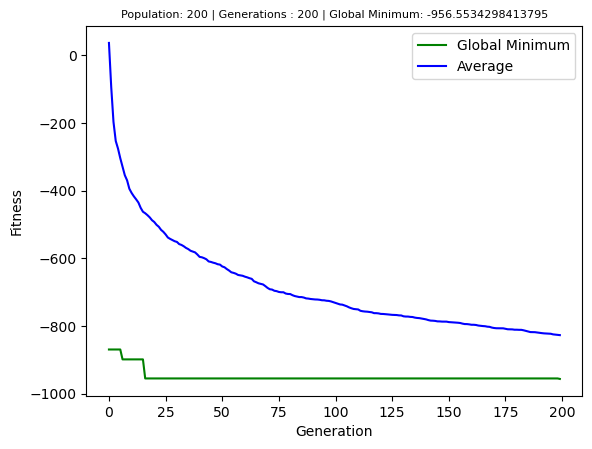

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

def eggholder(X):
	# X is a np.array
	return (-(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1] + 47)))) -X[0] * np.sin(np.sqrt(abs(X[0] - (X[1] + 47)))))


def DifferentialEvolution(populationSize : int, generations : int):
	# CONSTANTS as defined by the question
	dimensionSize = 2 # (x, y)
	bounds = [(-512, 512), (-512, 512)]
	crossoverProbability = 0.8
	K = 0.5

	generations_AvgFitness = []
	generations_GlobMinFitness = []

	# Initialize random parents
	parents = [ np.array([random.uniform(bounds[j][0], bounds[j][1]) for j in range(dimensionSize)]) for i in range(populationSize)]

	generationNumber = 0

	while (generationNumber < generations):
		generationNumber += 1
		children = [] # The new children will be added here
		F = random.uniform(-2.0, 2.0) # Our F is to be randomly generated every generation

		for index, vector in enumerate(parents):
			# Remove the parent vector so that R1, R2 and R3 won't be selected as the parent vector
			pruned_parents = parents.copy()
			pruned_parents.pop(index)

			# This while loop exists only if the Vector_Trial is out of bounds (i.e. not between (-512, 512))
			while (True):
				Vector_R1, Vector_R2, Vector_R3 = random.sample(pruned_parents, 3)

				#  Mutant Vector
				Vector_Mutant = vector + K * (Vector_R1 - vector) + F * (Vector_R2 - Vector_R3)

				# Trial Vector
				Vector_Trial = np.array([0.0 for i in range(dimensionSize)])

				# Crossover
				for gene in range(dimensionSize):
					crossoverRealtime = random.random()

					if crossoverRealtime < crossoverProbability:
						Vector_Trial[gene] = Vector_Mutant[gene]
					else:
						Vector_Trial[gene] = vector[gene]

				# Check if the Trial Vector is in bounds (i.e. between (-512, 512))
				flagInBounds = True
				for i in range(dimensionSize):
					if not ((bounds[i][0] < Vector_Trial[i]) and (Vector_Trial[i] < bounds[i][1])):
						flagInBounds = False
						break

				# Elitism: Get the better vector w.r.t. fitness
				if flagInBounds:
					if eggholder(Vector_Trial) < eggholder(vector):
						children.append(Vector_Trial)
					else:
						children.append(vector)
					break

		# Calculate values for plotting
		parents_values = [ (eggholder(i), i) for i in parents ]
		parents_values.sort()

		generations_GlobMinFitness.append(parents_values[0][0])

		average = 0
		for child in parents_values:
			average += child[0]

		generations_AvgFitness.append(average/populationSize)

		parents = children.copy()

	plt.cla()
	plt.plot(generations_GlobMinFitness, color='green', linestyle='-', label="Global Minimum")
	plt.plot(generations_AvgFitness, color='blue', linestyle='-', label="Average")
	plt.title("Population: " + str(populationSize) + " | Generations : " + str(generations) + " | Global Minimum: " + str(generations_GlobMinFitness[len(generations_GlobMinFitness)-1]),
		fontdict={'fontsize' : 8})
	plt.legend()
	plt.locator_params(axis='y', nbins=10)
	plt.xlabel("Generation")
	plt.ylabel("Fitness")
	plt.savefig("DiffEvo-Pop_"+str(populationSize)+"_Gens_"+str(generations)+".png", dpi=500)


if __name__ == '__main__':
	print ("Differential Evolution - Eggholder Function")

	populationSize = [20, 50, 100, 200]
	generations = [50, 100, 200]

	for generation in generations:
		for population in populationSize:
			DifferentialEvolution(population, generation)

ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1
ERROR-------> 50.0
global_best_position 50.0 -1


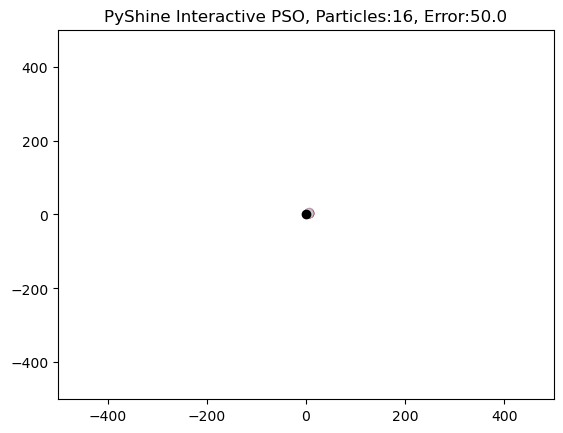

ERROR-------> 42.57480217155231
global_best_position 42.57480217155231 -1
ERROR-------> 50.54856463215987
global_best_position 50.54856463215987 42.57480217155231
ERROR-------> 43.32644428551896
global_best_position 43.32644428551896 42.57480217155231
ERROR-------> 47.452557266440664
global_best_position 47.452557266440664 42.57480217155231
ERROR-------> 44.6552931574966
global_best_position 44.6552931574966 42.57480217155231
ERROR-------> 45.70194407757357
global_best_position 45.70194407757357 42.57480217155231
ERROR-------> 53.40912206594645
global_best_position 53.40912206594645 42.57480217155231
ERROR-------> 55.47844166857899
global_best_position 55.47844166857899 42.57480217155231
ERROR-------> 46.08825910201881
global_best_position 46.08825910201881 42.57480217155231
ERROR-------> 55.40191241390839
global_best_position 55.40191241390839 42.57480217155231
ERROR-------> 50.55231867219483
global_best_position 50.55231867219483 42.57480217155231
ERROR-------> 44.32602534734654
glob

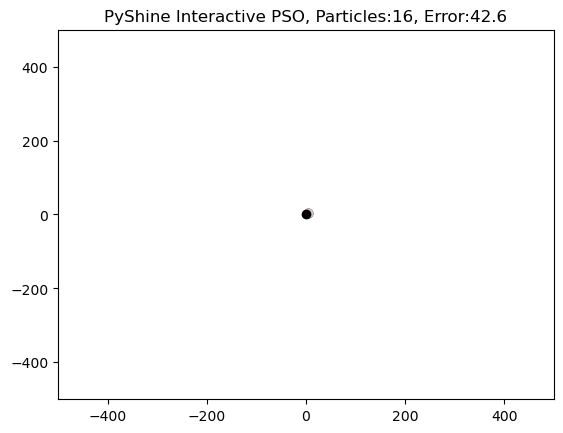

ERROR-------> 39.09923701280603
global_best_position 39.09923701280603 42.57480217155231
ERROR-------> 44.15612780417815
global_best_position 44.15612780417815 -1
ERROR-------> 39.01893932278823
global_best_position 39.01893932278823 -1
ERROR-------> 37.74388534919278
global_best_position 37.74388534919278 -1
ERROR-------> 40.038072839461655
global_best_position 40.038072839461655 -1
ERROR-------> 42.05231472552701
global_best_position 42.05231472552701 -1
ERROR-------> 43.48742405492225
global_best_position 43.48742405492225 -1
ERROR-------> 36.613140203244676
global_best_position 36.613140203244676 -1
ERROR-------> 38.96593864452693
global_best_position 38.96593864452693 -1
ERROR-------> 42.70713283235301
global_best_position 42.70713283235301 -1
ERROR-------> 46.12970115805456
global_best_position 46.12970115805456 -1
ERROR-------> 38.02476870808597
global_best_position 38.02476870808597 -1
ERROR-------> 42.56702119501068
global_best_position 42.56702119501068 -1
ERROR-------> 42.35

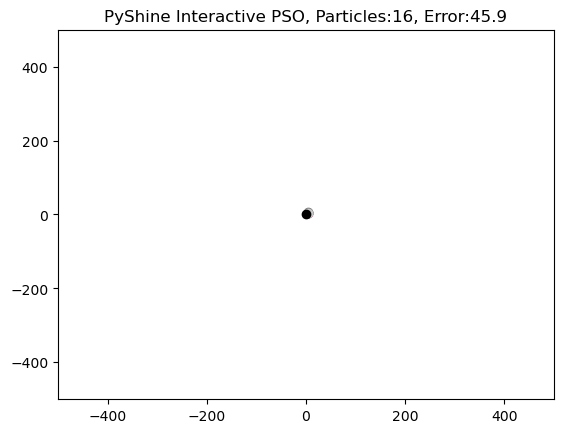

ERROR-------> 40.403701646712506
global_best_position 40.403701646712506 -1
ERROR-------> 35.76545709913648
global_best_position 35.76545709913648 40.403701646712506
ERROR-------> 40.345803479238754
global_best_position 40.345803479238754 35.76545709913648
ERROR-------> 45.78223460447371
global_best_position 45.78223460447371 35.76545709913648
ERROR-------> 41.895395510493145
global_best_position 41.895395510493145 35.76545709913648
ERROR-------> 40.611221624246355
global_best_position 40.611221624246355 35.76545709913648
ERROR-------> 40.94838741274336
global_best_position 40.94838741274336 35.76545709913648
ERROR-------> 30.69211867931564
global_best_position 30.69211867931564 35.76545709913648
ERROR-------> 40.95417788857196
global_best_position 40.95417788857196 30.69211867931564
ERROR-------> 38.98878528601973
global_best_position 38.98878528601973 30.69211867931564
ERROR-------> 42.51815235416119
global_best_position 42.51815235416119 30.69211867931564
ERROR-------> 37.4021249882

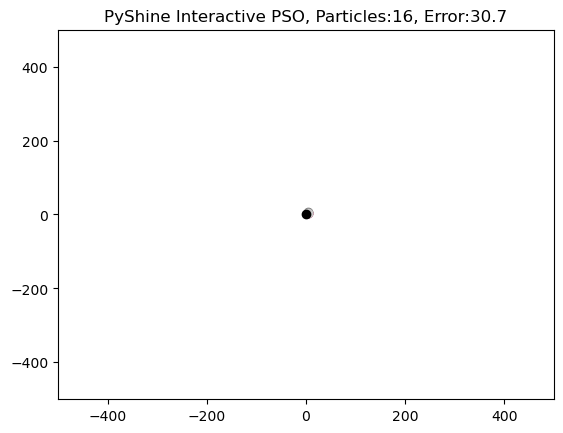

ERROR-------> 37.723303009945134
global_best_position 37.723303009945134 30.69211867931564
ERROR-------> 26.592824388098435
global_best_position 26.592824388098435 -1
ERROR-------> 29.157705555070514
global_best_position 29.157705555070514 -1
ERROR-------> 42.614175036952176
global_best_position 42.614175036952176 -1
ERROR-------> 25.79906046116049
global_best_position 25.79906046116049 -1
ERROR-------> 34.33042747183957
global_best_position 34.33042747183957 -1
ERROR-------> 32.51795807207141
global_best_position 32.51795807207141 -1
ERROR-------> 27.94115989310815
global_best_position 27.94115989310815 -1
ERROR-------> 32.881837652178255
global_best_position 32.881837652178255 -1
ERROR-------> 34.38922125446764
global_best_position 34.38922125446764 -1
ERROR-------> 32.23183083115027
global_best_position 32.23183083115027 -1
ERROR-------> 29.95576890103816
global_best_position 29.95576890103816 -1
ERROR-------> 29.396141130601226
global_best_position 29.396141130601226 -1
ERROR------

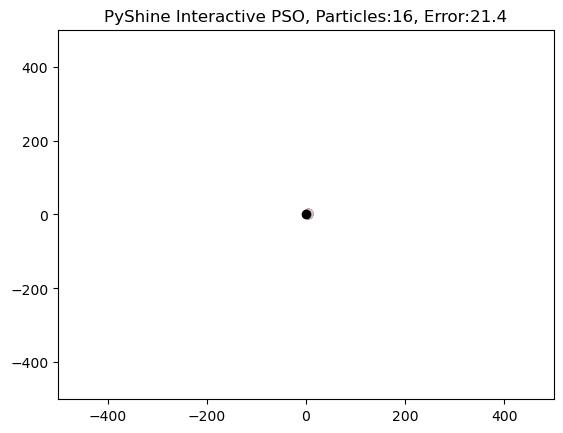

ERROR-------> 18.714811532552243
global_best_position 18.714811532552243 -1
ERROR-------> 22.221518751092795
global_best_position 22.221518751092795 18.714811532552243
ERROR-------> 16.071190339272196
global_best_position 16.071190339272196 18.714811532552243


KeyboardInterrupt: 

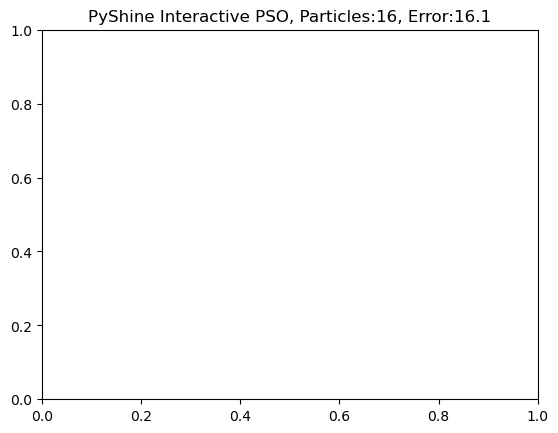

In [7]:
import random
import math
import numpy as np
import csv, os
import _thread
import matplotlib.pyplot as plt

print(str(0)+','+str( 0),file = open('target.csv','w'))
def start_drag():
	os.system('python Draggable.py')
_thread.start_new_thread(start_drag,())

initial = [5,5]
bounds = [(-800,800),(-800,800)]

colors = np.array([
    ( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
    ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229),

    ( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
    ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229),

    ( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
    ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229),

    ( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
    ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229)

]) / 255.


class Particle:
	def __init__(self,initial):
		self.pos=[]
		self.vel=[]
		self.best_pos=[]
		self.best_error=-1
		self.error=-1
		for i in range(0,num_dimensions):
			self.vel.append(random.uniform(-1,1))
			self.pos.append(initial[i])

	def update_velocity(self,global_best_position):
		w = 0.5
		c1 = 1
		c2 = 2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			cog_vel=c1*r1*(self.best_pos[i]-self.pos[i])
			social_vel=c2*r2*(global_best_position[i]-self.pos[i])
			self.vel[i]=w*self.vel[i]+cog_vel+social_vel

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.pos[i]=self.pos[i]+self.vel[i]


			if self.pos[i]>bounds[i][1]:
				self.pos[i]=bounds[i][1]


			if self.pos[i] < bounds[i][0]:
				self.pos[i]=bounds[i][0]


	def evaluate_fitness(self,fitness_function):
		self.error=fitness_function(self.pos)
		print("ERROR------->",self.error)

		if self.error < self.best_error or self.best_error==-1:
			self.best_pos=self.pos
			self.best_error=self.error

def fitness_function(x):
	x0,y0 = getXY('target.csv')
	x0=float(x0)
	y0=float(y0)
	total=0
	total+=(x0-x[0])**2 +(y0-x[1])**2
	return total


def getXY(filename):
	lat=0
	long=0
	with open(filename) as csvDataFile:
		csvReader = csv.reader(csvDataFile)
		for row in csvReader:
			lat = row[0]
			long= row[1]
	return lat,long
import time

class Interactive_PSO():
	def __init__(self,fitness_function,initial,bounds,num_particles):
		global num_dimensions

		num_dimensions = len(initial)
		global_best_error=-1
		global_best_position=[]
		self.gamma = 0.0001
		swarm=[]
		for i in range(0,num_particles):
			swarm.append(Particle(initial))

		i=0
		while True:

			#print('x'+','+'y',file = open('pos.csv','w'))
			for j in range(0,num_particles):
				swarm[j].evaluate_fitness(fitness_function)
				print('global_best_position',swarm[j].error,global_best_error)


				if swarm[j].error < global_best_error or global_best_error == -1:
					global_best_position=list(swarm[j].pos)
					global_best_error=float(swarm[j].error)
					plt.title("PyShine Interactive PSO, Particles:{}, Error:{}".format(num_particles,round(global_best_error,1)))

				if i%2==0:
					global_best_error=-1
					global_best_position = list([swarm[j].pos[0]+self.gamma*(swarm[j].error)*random.random() ,swarm[j].pos[1]+self.gamma*(swarm[j].error)*random.random() ])


			pos_0 = {}
			pos_1 = {}
			for j in range(0,num_particles):
				pos_0[j] = []
				pos_1[j] = []

			for j in range(0,num_particles):
				swarm[j].update_velocity(global_best_position)
				swarm[j].update_position(bounds)


				pos_0[j].append(swarm[j].pos[0])
				pos_1[j].append(swarm[j].pos[1])
				#print(str(swarm[j].pos[0])+','+str(swarm[j].pos[1]),file = open('pos.csv','a'))
				plt.xlim([-500, 500])
				plt.ylim([-500, 500])

			for j in range(0,num_particles):
				plt.plot(pos_0[j], pos_1[j],  color = colors[j],marker = 'o'  )


			x,y = getXY('target.csv')
			plt.plot(float(x), float(y),  color = 'k',marker = 'o'  )
			plt.pause(0.01)

			plt.clf()
			i+=1
		print ('Results')
		print ('Best Position:',global_best_position)
		print( 'Best Error:',global_best_error)


Interactive_PSO(fitness_function,initial,bounds,num_particles=16)# let say 2 particles and 50 iterations
if __name__ == "__Interactive_PSO__":
    main()

Gets the global best fitness=> -0.00000
display the solution of the optimization problem x1=> -0.00000 x2=> 0.00000
Generacion: 1 - - - Gbest: [0.16731758 0.67569347]


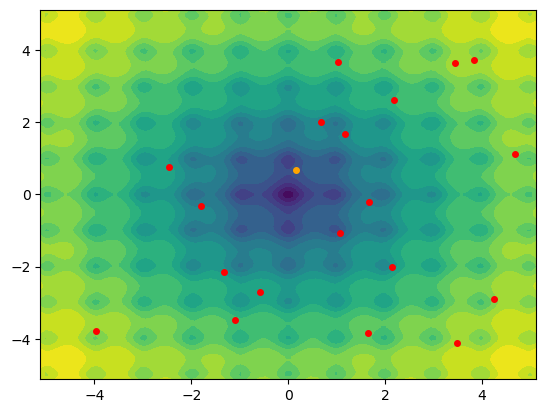

Generacion: 2 - - - Gbest: [0.16731758 0.67569347]
Generacion: 3 - - - Gbest: [ 0.93313507 -0.06403384]
Generacion: 4 - - - Gbest: [ 0.15961507 -0.00336597]
Generacion: 5 - - - Gbest: [ 0.15961507 -0.00336597]
Generacion: 6 - - - Gbest: [ 0.15961507 -0.00336597]
Generacion: 7 - - - Gbest: [ 0.15961507 -0.00336597]
Generacion: 8 - - - Gbest: [-0.09347386 -0.04442532]
Generacion: 9 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 10 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 11 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 12 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 13 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 14 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 15 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 16 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 17 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 18 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 19 - - - Gbest: [ 0.01294587 -0.02227056]
Generacion: 20 - - - Gbest: [ 0.012945

In [8]:
import numpy as np
from random import random,seed
import math
import random as rand
import matplotlib.pyplot as plt


#seed(1)

def dropwave(x):
  d=x.shape[0]
  x1=x[0]
  x2=x[1]
  for i in range(d):
    part_1 = -0.2*np.sqrt(0.5*(x1*x1 + x2*x2))
    part_2 = 0.5*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))
    value = np.exp(1) + 20 -20*np.exp(part_1) - np.exp(part_2)
  return value
x_max=32.768
x_min=-32.768




c1=2.05
c2=2.05
ini_v=0.5

maxiter = 1000
w0 = 0.9
wf=0.1
slope = (wf-w0)/maxiter
w= w0
max_v = 5

S=10
x=np.zeros((S,2))
v=np.zeros((S,2))
y=np.zeros((S,2))

part,dim=x.shape


f_ind=1e10*np.ones([part,1])
fx=np.zeros((part,1))

for i in range(part):
  for j in range(dim):
    x[i,j]=x_min+ (x_max-x_min) * random()
    v[i,j]=ini_v
    y[i,j]=1e10

t=0
while t<maxiter:

  for i in range(part):
    fx[i,0]=dropwave(x[i,:])
    if fx[i,0]<f_ind[i,0]:
      y[i,:]=x[i,:]
      f_ind[i,0]=fx[i,0]


  bestfitness=np.amin(f_ind)
  result = np.where(f_ind == np.amin(f_ind))
  p=result[0]

  ys=y[p,:]

  for j in range(dim):
    for i in range(part):
      r1=random()
      r2=random()
      v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

      if math.fabs(v[i,j])>max_v:
        if v[i,j]>0:
          v[i,j] = max_v
        else:
          v[i,j] = -max_v

      x[i,j]=x[i,j] + v[i,j]

  w=w+slope
  t=t+1

print("Gets the global best fitness=> {:.5f}".format(dropwave(ys[0,:])))
print("display the solution of the optimization problem x1=> {:.5f} x2=> {:.5f}".format(ys[0,0],ys[0,1]))
num_variables=2
generation=0
x_max=5.12
x_min=-5.12


plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.grid(True)


# create data points
xx = np.linspace(-5.12, 5.12, 100)
yy = np.linspace(-5.12, 5.12, 100)
# create grid
x1, x2 = np.meshgrid(xx, yy)

l=[x1,x2]
arr = np.array(l)

z = dropwave(arr)

#fig, ax = plt.subplots()
# set labels


c1=2.05
c2=2.05
ini_v=3

maxiter = 100
w0 = 0.9
wf=0.1
slope = (wf-w0)/maxiter
w= w0
max_v = ini_v/3


S=20 #número de partículas

d=2

x=np.zeros((S,d))
v=np.zeros((S,d))
y=np.zeros((S,d))

part,dim=x.shape


f_ind=1e10*np.ones([part,1])
fx=np.zeros((part,1))

for i in range(part):
    for j in range(dim):
        x[i,j]=x_min+ (x_max-x_min) * random()
        v[i,j]=ini_v
        y[i,j]=1e10

t=0

while(generation < 100):
    cp=ax.contourf(x1, x2, z, 20, cmap='viridis')
    for i in range(part):
        fx[i,0]=dropwave(x[i,:])

        if fx[i,0]<f_ind[i,0]:
            y[i,:]=x[i,:]
            f_ind[i,0]=fx[i,0]


    bestfitness=np.amin(f_ind)
    result = np.where(f_ind == np.amin(f_ind))
    p=result[0]

    ys=y[p,:]#posição da melhor partícula

    for j in range(dim):
        for i in range(part):
            r1=random()
            r2=random()

            v[i,j]=w*v[i,j] + c1*r1*(y[i,j]-x[i,j]) + c2*r2*(ys[0,j]-x[i,j])

            if math.fabs(v[i,j])>max_v:
                if v[i,j]>0:
                    v[i,j] = max_v
                else:
                    v[i,j] = -max_v

            x[i,j]=x[i,j] + v[i,j]

    w=w+slope

    generation=generation+1

    print('Generacion: ' + str(generation) + ' - - - Gbest: ' +str(ys[0,:]))

    line1 = ax.plot(x[:,0], x[:,1], 'ro', linewidth=2, markersize=4)
    line2 = ax.plot(ys[0,0],ys[0,1], 'o',color='orange', linewidth=2, markersize=4)


    ax.set_xlim(x_min, x_max)
    ax.set_ylim(x_min, x_max)

    #fig.canvas.draw()
    plt.pause(0.1)
    ax.clear()
    ax.grid(True)